# Finding Ten New Markets To Launch 
Our Marketing team had a successful campaign in St. Petersburg, my aim with this project is to find ten such similar regions. 

### The Approach:

I will be using unsupervised learning to find cluster of Russian alcohol consumption pattern over the year. Once the clusters are identified, I will select ten regions from the cluster to which St. Petersburg belong.

### About The Data:

The marketing team had sourced the historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

### Detailed Data Analysis and Model Creation

Highlights of the steps involved:

- Instal and import any necessary packages for the analysis
- Check the data for it's Completness, Consistency and Clarity
- Perform necessary Exploratory Data Analysis
- Process the data for model building
- Build the model(s)
- Present the findings





### Summary Findings
Based on the data model and analysis, following are the 10 regions for the marketing team to start their promotion
- Novgorod Oblast
- Yaroslavl Oblast
- Pskov Oblast
- Vladimir Oblast
- Ivanovo Oblast
- Mari El Republic
- Vologda Oblast
- Kaliningrad Oblast
- Leningrad Oblast
- Smolensk Oblast

### Detailed Analysis and Model Building

### Installing Necessary Packages 
- Missingno package helps with missing data in terms of finding patterns etc.

In [1]:
pip install missingno


  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)


  Using cached numpy-1.21.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)


  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)


  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)


  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)


  Using cached Pillow-8.4.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)


  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)


  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


  Using cached pyparsing-3.0.4-py3-none-any.whl (96 kB)


  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


  Using cached pandas-1.3.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)


  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)


ERROR: pip's dependency reso

### Importing Python Packages:

- Pandas and Numpy : For all data manipulation
- Matplotlib and Seaborn: For data visulaization
- Sklearn: Data processing for the model, model building, and analysis
- Scipy: For hierarchial clustering


In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import numpy as np


In [3]:
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


### Data Check Up & Exploratory Data Analysis

Checking data for it's integrety and quality, which would involve checking data quality in terms of completeness of the data, range of data and cleanliness of the data

In [4]:
# Running descriptive statistics of the data
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


Clearly there are some missing data as the count is not uniform across all the columns. Also the minimum value is not 0, except for brandy, which may suggest that missing values are not represented by 0.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1615 entries, 0 to 1614

Data columns (total 7 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   year       1615 non-null   int64  

 1   region     1615 non-null   object 

 2   wine       1552 non-null   float64

 3   beer       1557 non-null   float64

 4   vodka      1554 non-null   float64

 5   champagne  1552 non-null   float64

 6   brandy     1549 non-null   float64

dtypes: float64(5), int64(1), object(1)

memory usage: 88.4+ KB


Most of the data is in corect data type, except the year, I will convert it to date format

In [6]:
df['year']=pd.to_datetime(df['year'], format='%Y', errors='coerce').dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1615 entries, 0 to 1614

Data columns (total 7 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   year       1615 non-null   int64  

 1   region     1615 non-null   object 

 2   wine       1552 non-null   float64

 3   beer       1557 non-null   float64

 4   vodka      1554 non-null   float64

 5   champagne  1552 non-null   float64

 6   brandy     1549 non-null   float64

dtypes: float64(5), int64(1), object(1)

memory usage: 88.4+ KB


Use of dt.year, gives the type as int, since the data is for particular year, it should be fine. 

#### Time To Analyse Missing Data

In [7]:
#Missing Data
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

Count of missing data is almost the same, need to check if there is any pattern around it.

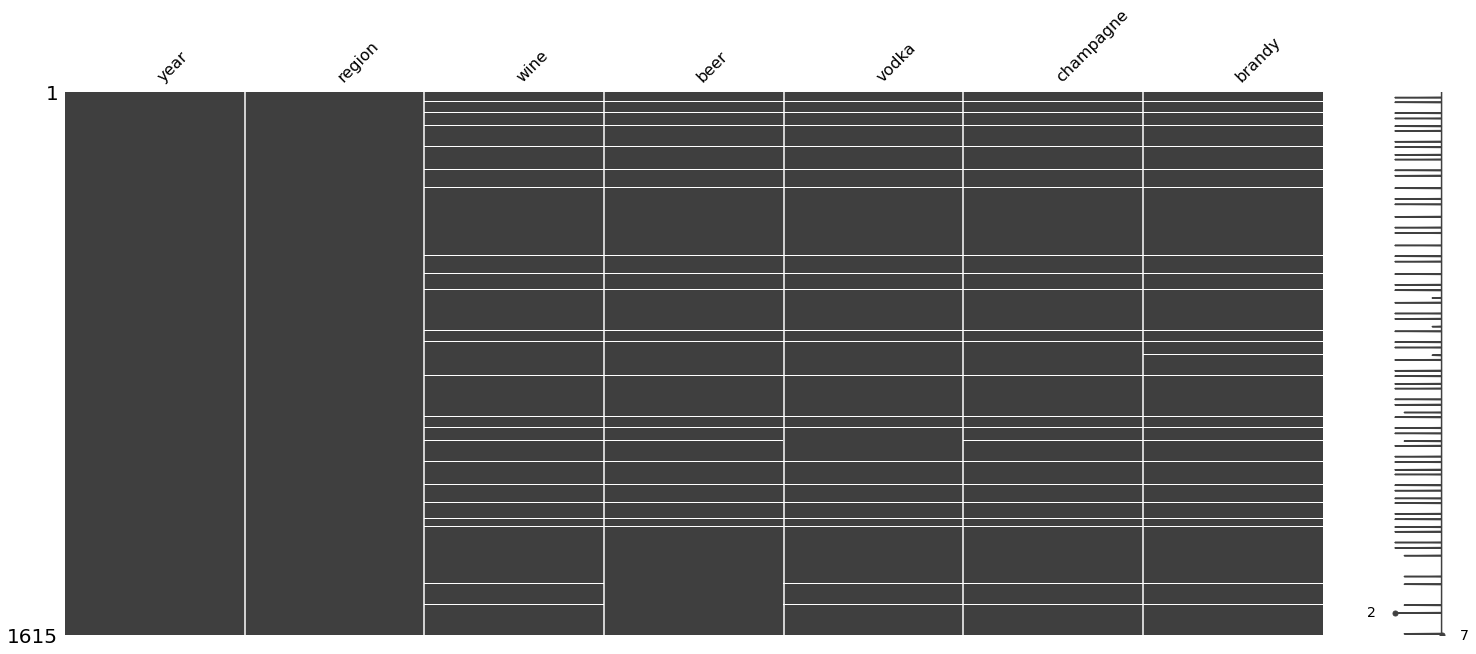

In [8]:
msno.matrix(df)
plt.show()

Looks like the missing numbers are following a pattern. Sorting the data may help us in our quest to find some pattern

In [9]:
df.sort_values(['wine','beer','vodka','champagne','brandy'],inplace=True)

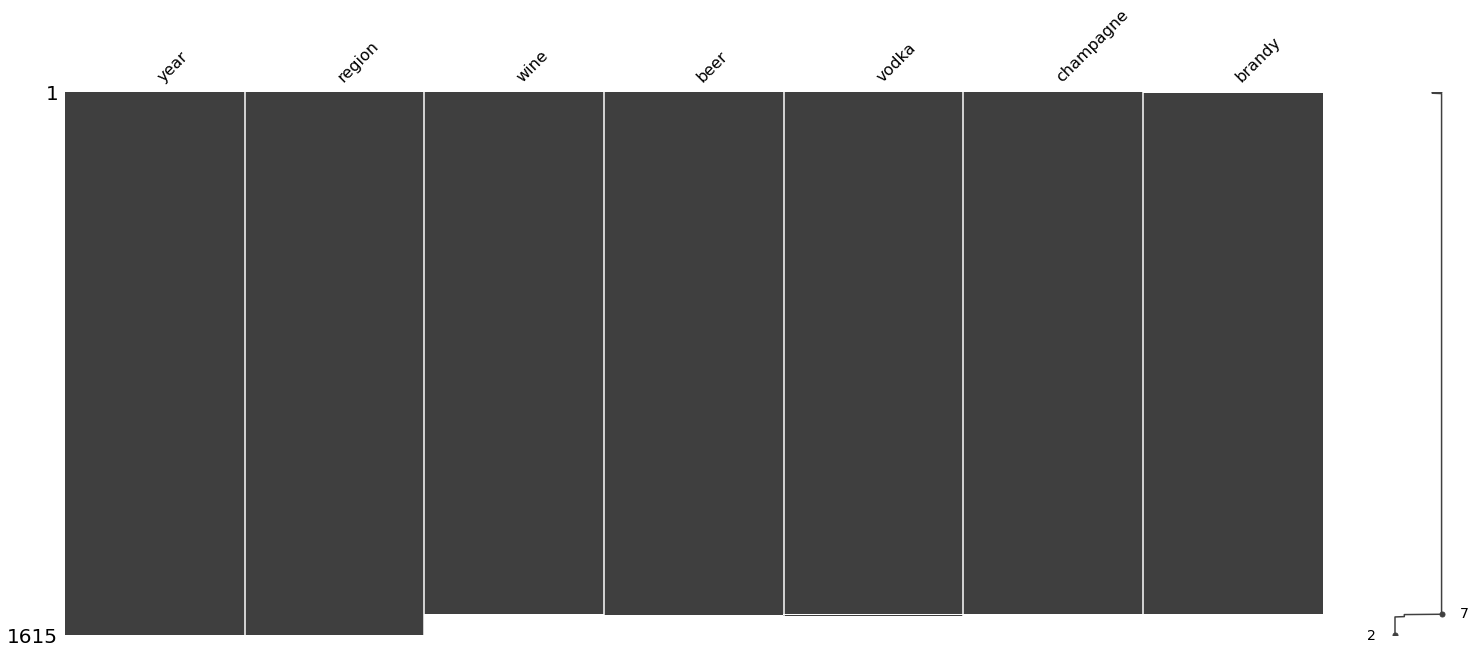

In [10]:
msno.matrix(df)
plt.show()

Looks like data is not missing at random

In [11]:
beverages = ['wine','beer','vodka','champagne','brandy']
for beverage in beverages:
    print('-----------{}------------'.format(beverage))
    print(df[df[beverage].isna()].value_counts('region'))

-----------wine------------

region

Chechen Republic          19

Republic of Crimea        16

Sevastopol                16

Republic of Ingushetia    12

dtype: int64

-----------beer------------

region

Chechen Republic          16

Republic of Crimea        16

Sevastopol                16

Republic of Ingushetia    10

dtype: int64

-----------vodka------------

region

Chechen Republic          19

Republic of Crimea        16

Sevastopol                16

Republic of Ingushetia    10

dtype: int64

-----------champagne------------

region

Chechen Republic          19

Republic of Crimea        16

Sevastopol                16

Republic of Ingushetia    12

dtype: int64

-----------brandy------------

region

Chechen Republic          19

Republic of Crimea        16

Sevastopol                16

Republic of Ingushetia    15

dtype: int64


Clearly the Chechen Republic, Republic of Crimea, Sevastopol and Republic of Ingushetia are the regions with missing values. Which may point to the fact that these regions may have some political instability, making it difficult to collect data or some may have been annexed to Russia in the recent years. Plotting the year over year trend

In [12]:
# converting the data to long form for easier visulaization
df_long = pd.melt(df,id_vars=['year','region'],value_vars=beverages,var_name='beverage',value_name='sales_per_capita')

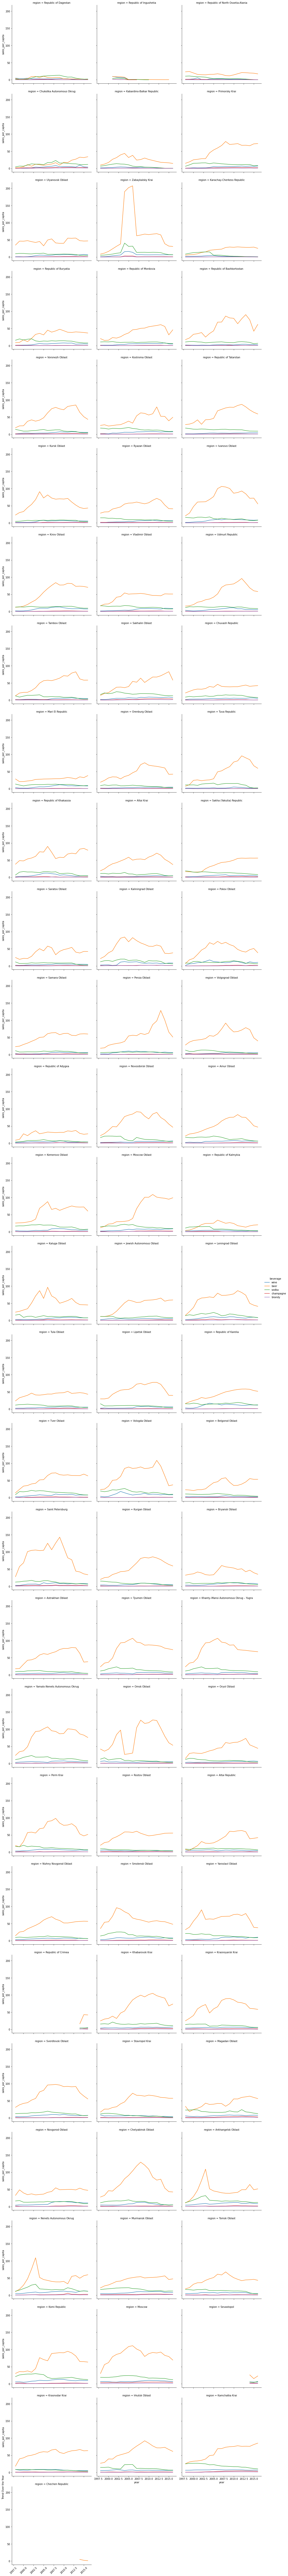

In [13]:
sns.relplot(x='year',y='sales_per_capita',data=df_long,kind='line',hue='beverage',col='region',col_wrap=3)
plt.xticks(rotation=45)
plt.ylabel('Trend Over the Year',y=.99)
plt.xlabel('')
plt.show()

Clearly for the four regions with missing data, the data was not collected before 2014. Any imputaion will add noise to the data, so for our models I will delete those records with missing data.

Next, step is to look for any outliers in the data

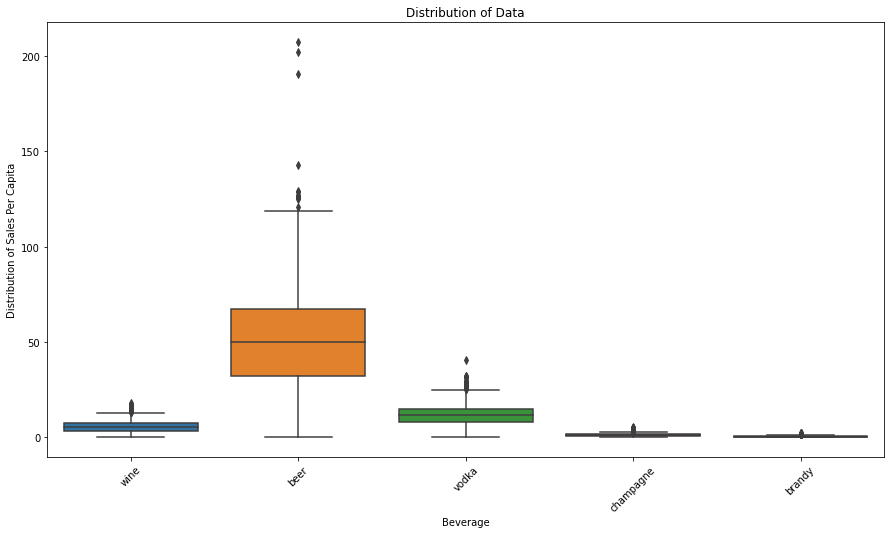

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x='beverage',y='sales_per_capita', data = df_long)
plt.xticks(rotation=45)
plt.ylabel('Distribution of Sales Per Capita')
plt.xlabel('Beverage')
plt.title('Distribution of Data')
plt.show()

Beer has some outliers

In [15]:
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [16]:
# Beer Oulier: 67.4 + 1.5*(67.4-32.4)
# Wine Outlier: 7.4 + 1.5 * (7.4 - 3.6)
# Vodka Outlier: 15 + 1.5 * (15 - 8.3)

In [17]:
df[df['beer']>119.9]

,year,region,wine,beer,vodka,champagne,brandy
896,2008,Omsk Oblast,4.80,126.30,8.70,1.00,0.30
1151,2011,Omsk Oblast,5.02,126.93,6.78,1.28,0.44
1236,2012,Omsk Oblast,5.10,125.20,7.00,1.40,0.50
1324,2013,Penza Oblast,6.30,128.50,6.00,1.00,0.40
739,2006,Saint Petersburg,7.60,125.30,16.40,2.40,1.40
994,2009,Saint Petersburg,7.70,143.00,9.40,2.40,1.30
909,2008,Saint Petersburg,10.40,125.90,12.50,3.60,2.10
928,2008,Chelyabinsk Oblast,12.40,129.40,15.30,1.70,0.60
1013,2009,Chelyabinsk Oblast,12.70,120.80,15.20,1.80,0.60
695,2006,Zabaykalsky Krai,13.70,207.30,31.70,3.10,1.30


In [18]:
df[df['wine']>13.1]

,year,region,wine,beer,vodka,champagne,brandy
962,2009,Kirov Oblast,13.40,77.00,14.20,1.40,0.50
450,2003,Republic of Karelia,13.50,31.10,14.20,0.60,0.20
477,2003,Pskov Oblast,13.50,52.90,10.90,0.60,0.10
960,2009,Republic of Karelia,13.60,52.40,16.40,1.40,1.00
1072,2010,Pskov Oblast,13.60,58.10,15.10,2.00,0.90
695,2006,Zabaykalsky Krai,13.70,207.30,31.70,3.10,1.30
1149,2011,Novgorod Oblast,13.71,49.97,14.89,2.51,1.06
521,2004,Vologda Oblast,14.20,85.10,26.70,0.60,0.70
875,2008,Republic of Karelia,14.30,50.00,17.40,1.40,0.80
894,2008,Novgorod Oblast,14.50,54.60,14.40,1.80,0.80


In [19]:
df[df['vodka']>25]

,year,region,wine,beer,vodka,champagne,brandy
224,2000,Komi Republic,4.6,35.1,27.4,1.9,0.4
309,2001,Komi Republic,5.6,37.6,28.5,0.8,0.5
139,1999,Komi Republic,5.9,35.7,25.9,2.5,0.6
23,1998,Kamchatka Krai,6.4,25.5,25.1,0.8,0.4
108,1999,Kamchatka Krai,6.5,30.6,26.4,0.9,0.4
193,2000,Kamchatka Krai,7.1,32.7,26.6,0.8,0.4
363,2002,Kamchatka Krai,7.3,35.3,25.9,1.2,0.5
278,2001,Kamchatka Krai,7.4,33.6,26.7,0.9,0.4
448,2003,Kamchatka Krai,7.4,39.1,25.1,1.8,1.2
394,2002,Komi Republic,7.6,33.9,28.4,0.9,0.5


Three biggest outliers for the three beverages are from the same region: Zabaykalsky and are over a period of three years, 2004, 05 and 06

In [20]:
df[df['region']=='Zabaykalsky Krai']

,year,region,wine,beer,vodka,champagne,brandy
15,1998,Zabaykalsky Krai,0.90,8.60,5.00,0.20,0.10
100,1999,Zabaykalsky Krai,1.10,11.50,5.80,0.20,0.10
185,2000,Zabaykalsky Krai,1.90,16.40,7.00,0.30,0.10
270,2001,Zabaykalsky Krai,3.50,23.80,8.60,0.40,0.10
355,2002,Zabaykalsky Krai,4.70,31.30,10.90,0.50,0.10
440,2003,Zabaykalsky Krai,5.90,38.10,12.40,0.60,0.10
1545,2016,Zabaykalsky Krai,6.40,30.80,6.80,0.90,0.30
1290,2013,Zabaykalsky Krai,6.40,64.50,12.70,1.10,0.40
1035,2010,Zabaykalsky Krai,6.40,65.30,13.40,1.00,0.40
950,2009,Zabaykalsky Krai,6.50,66.80,13.80,1.00,0.40


For our models we will drop the data for 2004, 2005 and 2006 for Zabaykalsky Krai region, Also clearly beer is the most popular beverage in Russia

In [21]:
outlier_index = [695,525,610]

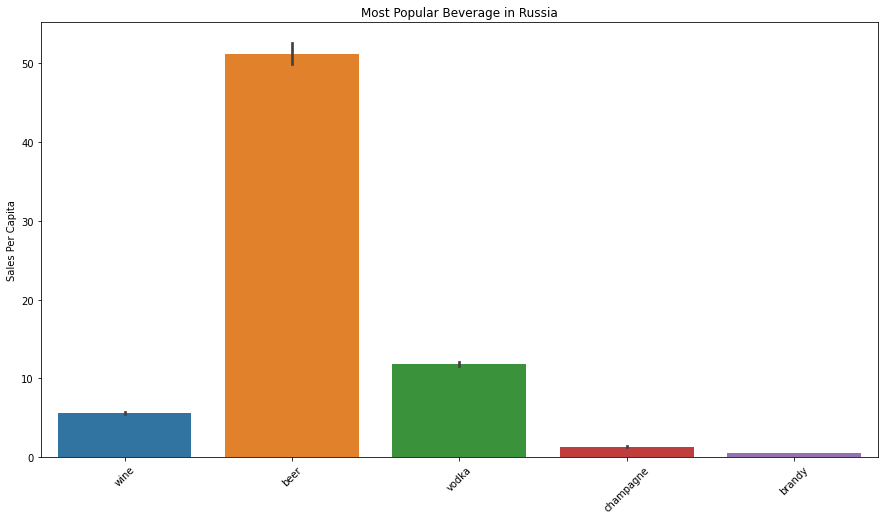

In [22]:
plt.figure(figsize=(15,8))
sns.set_palette('tab10')
sns.barplot(data=df_long,x='beverage',y='sales_per_capita')
plt.title('Most Popular Beverage in Russia',loc='center')
plt.xticks(rotation=45)
plt.ylabel('Sales Per Capita')
plt.xlabel('')
plt.show()

Since the data is collected over a period of time, trend of beverage cosumption in Russia may be interseting:

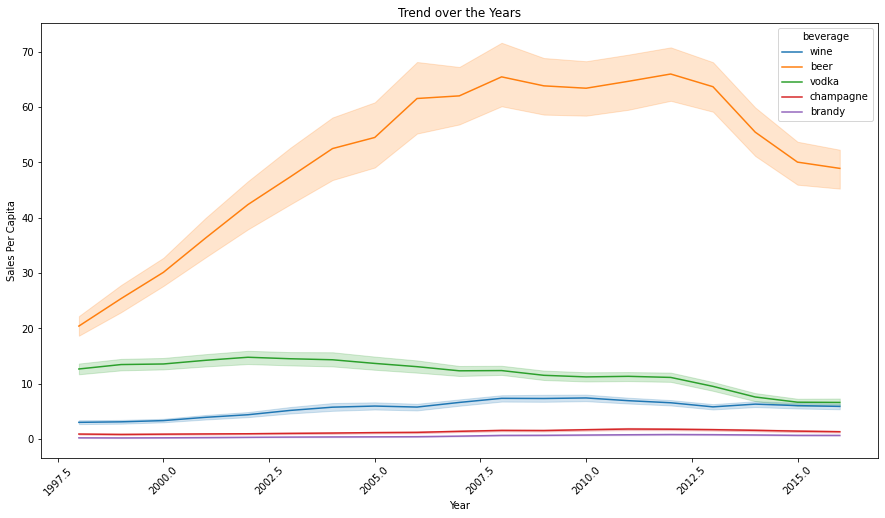

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year',y='sales_per_capita',data=df_long,hue='beverage')
plt.xticks(rotation=45)
plt.ylabel('Sales Per Capita')
plt.xlabel('Year')
plt.title('Trend over the Years')
plt.show()

There is overall downward trend in beer consumption in Russia, although it is still the most consummed alcoholic beverage.

Also since, our firm had launched a successful campaign in St. Petersburg it would be good idea to have a closer look at it

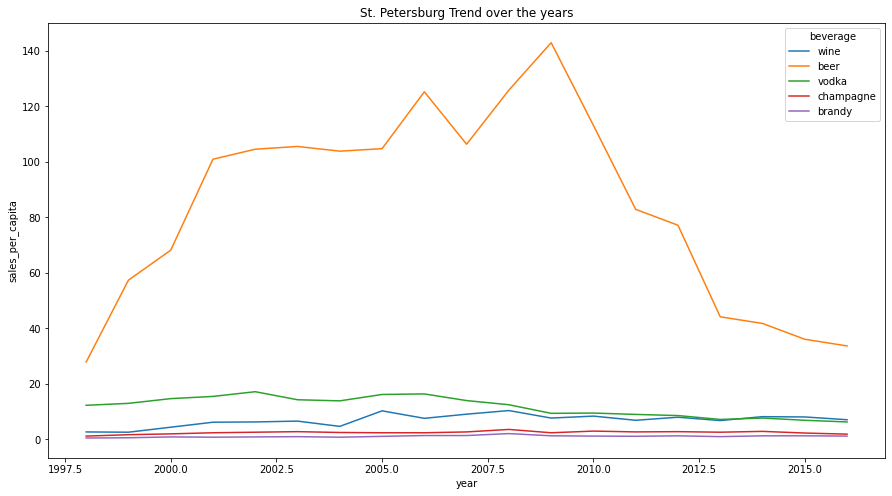

In [78]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year',y='sales_per_capita',data=df_long[df_long['region']=='Saint Petersburg'],hue='beverage')
plt.title('St. Petersburg Trend over the years')
plt.show()

Clearly wine consumption in recent year has gone up relatively while beer is consumed relatively lesser during last few years in St. Petersburg.

Final Exploratory Data Analysis I will be to do a correlation Analysis, to determine if there are highly correlated data.

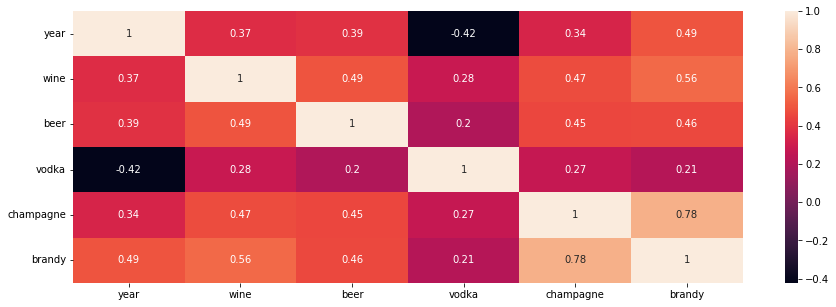

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

Clearly champagne and brandy are highly correlated and wine and brandy are second most correlated alcoholic beverages. 

High correlation between Brandy and Champagne can be handled by some feature engineering, like add those two columns together. Another way would be to use decomposition methods like PCA

### Model Building


#### Handing missing data

From our exploratory data analysis, most of the data that were missing were either because data was not collected before a certain period. For our model we will drop those missing records

In [26]:
df_processed = df.dropna(how='any',axis=0)

#### Handling Outliers

Droping the rows with outliers

In [27]:
df_processed = df_processed.drop(outlier_index)

#### Feature Engineering

Will add the columns of brandy and champagne

In [28]:
df_processed['brandy_champagne'] = df_processed['brandy'] + df_processed['champagne']

In [29]:
df_processed.drop(['brandy','champagne'],axis=1, inplace=True)

In [30]:
df_processed.describe()

,year,wine,beer,vodka,brandy_champagne
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000
mean,2007.023286,5.619909,51.229204,11.811125,1.837432
std,5.493695,2.776228,24.341493,5.000204,1.131918
min,1998.000000,0.100000,1.000000,0.400000,0.140000
25%,2002.000000,3.600000,32.600000,8.340000,1.000000
50%,2007.000000,5.400000,50.050000,11.500000,1.600000
75%,2012.000000,7.307500,67.400000,15.000000,2.300000
max,2016.000000,18.100000,143.000000,31.900000,7.310000


In [31]:
beverages_updated = ['wine', 'beer', 'vodka', 'brandy_champagne']

Plotting a pairplot to see the relationship between the variables and thier individual distribution

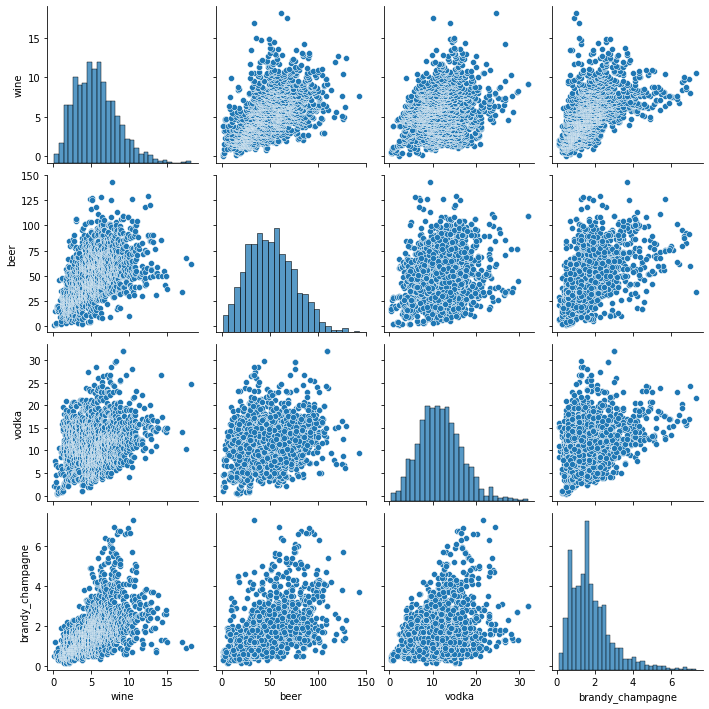

In [32]:
sns.pairplot(df_processed[beverages_updated])
plt.show()

Data is in good shape to build the first KMean model, for the model, year and reggions will be dropped 

In [33]:
df_processed_model = df_processed.drop(['year','region'], axis=1)

Standard scaler is used to make the data within a similar range

In [34]:
scaler = StandardScaler()
scaler.fit(df_processed_model)
scaled_transformed_data = scaler.transform(df_processed_model)

Plotting an elbow plot to determine the number of clusters

### Model KMeans

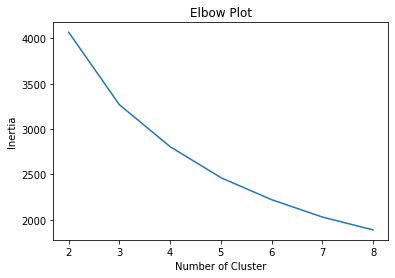

In [35]:
inertia = []
for i in range(2,9):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(scaled_transformed_data)
    inertia.append(kmean.inertia_)
plt.plot(range(2,9),inertia)
plt.title('Elbow Plot')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

We don't see a clear elbow, it's between 3 and 5, so we will consider the elbow in between 3 and 5 i.e. 4

In [36]:
kmean = KMeans(n_clusters = 4, random_state = 42)
kmean.fit(scaled_transformed_data)

KMeans(n_clusters=4, random_state=42)

In [37]:
df_processed['Cluster'] = kmean.labels_

In [38]:
df_processed[df_processed['region']=='Saint Petersburg']

,year,region,wine,beer,vodka,brandy_champagne,Cluster
144,1999,Saint Petersburg,2.6,57.40,13.00,2.30,0
59,1998,Saint Petersburg,2.7,27.90,12.30,1.70,1
229,2000,Saint Petersburg,4.4,68.20,14.70,2.90,3
569,2004,Saint Petersburg,4.7,103.90,13.90,3.30,2
314,2001,Saint Petersburg,6.2,101.00,15.50,3.20,2
399,2002,Saint Petersburg,6.3,104.60,17.20,3.50,2
484,2003,Saint Petersburg,6.6,105.60,14.30,3.80,2
1334,2013,Saint Petersburg,6.8,44.20,7.20,3.60,3
1164,2011,Saint Petersburg,6.9,82.93,9.01,3.84,2
1589,2016,Saint Petersburg,7.1,33.70,6.30,3.10,3


Although most of the St. Petersburg data is cluster areound 2 the most recent years are clustered at 3. So for finding similar regions will use cluster 3

In [39]:
St_Peterburrgs=df_processed['region'][df_processed['Cluster']==3].unique()

Implementing a hierarchial cluster to check how many clusters it provides

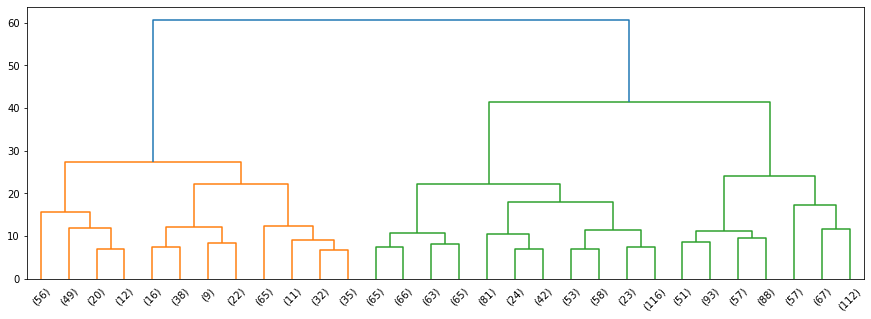

In [40]:
Z = linkage(scaled_transformed_data, 'ward')
plt.figure(figsize=(15,5))
dn = dendrogram(Z, truncate_mode = 'lastp')
plt.show()

Both KMeans and Hierarchial clustering seems to provide similar number of clusters

### Model Dimension Reduction Using PCA followed by KMeans

First will determine how many components of PCA defines the model

In [41]:
pca = PCA()
pca.fit_transform(scaled_transformed_data)

array([[-3.46956253, -0.72521644,  0.66959288, -0.54640255],
       [-2.46524707,  0.00819039,  0.30845386, -0.97287768],
       [-3.15803042, -0.31920428,  0.65464116, -0.62336092],
       ...,
       [ 1.71286378,  0.31806945,  1.87697617,  3.31954796],
       [ 2.18285413, -0.87862342,  0.89080792,  3.64043531],
       [ 3.15344991,  1.84315533,  0.63818022,  3.70826122]])

In [42]:
explained_variance = pca.explained_variance_ratio_

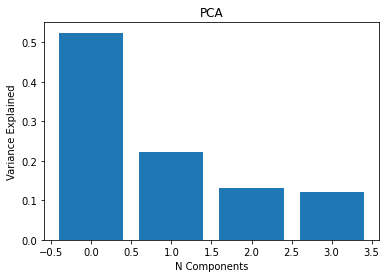

In [43]:
plt.bar(range(0,len(explained_variance)),explained_variance)
plt.xlabel('N Components')
plt.ylabel('Variance Explained')
plt.title('PCA')
plt.show()

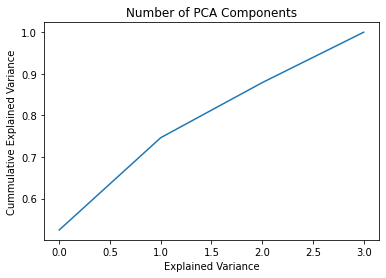

In [44]:
Cumsum_variance = np.cumsum(explained_variance)
plt.plot(np.arange(0,len(Cumsum_variance)),Cumsum_variance)
plt.xlabel('Explained Variance')
plt.ylabel('Cummulative Explained Variance')
plt.title('Number of PCA Components')
plt.show()

Clearly three components explains all the variance in data

In [45]:
pca3 = PCA(n_components=3, random_state=42)
pca3_transformed_data=pca3.fit_transform(scaled_transformed_data)

Using the PCA decomposed data for the KMeans

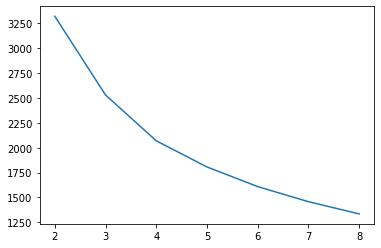

In [46]:
inertia= []
for i in range(2,9):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(pca3_transformed_data)
    inertia.append(kmean.inertia_)
plt.plot(range(2,9),inertia)
plt.show()

This also show 4 clusters

In [47]:
kmean_PCA = KMeans(n_clusters = 4, random_state = 42)
kmean_PCA.fit(pca3_transformed_data)

KMeans(n_clusters=4, random_state=42)

In [48]:
df_processed['Cluster_PCA'] = kmean_PCA.labels_

In [49]:
df_processed[['region','Cluster','Cluster_PCA']]

,region,Cluster,Cluster_PCA
1543,Republic of Dagestan,1,3
489,Republic of North Ossetia-Alania,1,3
81,Chukotka Autonomous Okrug,1,3
1458,Republic of Dagestan,1,3
1373,Republic of Dagestan,1,3
...,...,...,...
1064,Novgorod Oblast,2,2
620,Republic of Karelia,2,2
535,Republic of Karelia,2,2
562,Pskov Oblast,2,2


In [50]:
df_processed[df_processed['region']=='Saint Petersburg']

,year,region,wine,beer,vodka,brandy_champagne,Cluster,Cluster_PCA
144,1999,Saint Petersburg,2.6,57.40,13.00,2.30,0,1
59,1998,Saint Petersburg,2.7,27.90,12.30,1.70,1,3
229,2000,Saint Petersburg,4.4,68.20,14.70,2.90,3,0
569,2004,Saint Petersburg,4.7,103.90,13.90,3.30,2,2
314,2001,Saint Petersburg,6.2,101.00,15.50,3.20,2,2
399,2002,Saint Petersburg,6.3,104.60,17.20,3.50,2,2
484,2003,Saint Petersburg,6.6,105.60,14.30,3.80,2,2
1334,2013,Saint Petersburg,6.8,44.20,7.20,3.60,3,0
1164,2011,Saint Petersburg,6.9,82.93,9.01,3.84,2,2
1589,2016,Saint Petersburg,7.1,33.70,6.30,3.10,3,0


As in the orignal KMean clustering, for the PCA version, will use cluster 0 as it corresponds to latest data

In [58]:
St_Peterburrgs_PCA=df_processed['region'][df_processed['Cluster_PCA']==0].unique()

Inorder to find 10 regions similar to St. Petersburg, will use the intersection of cluster of St. Petersburg from orignal KMeans clustering and one obtained from PCA followed by Kmean Clustering

In [59]:
Common_Regions = [*set(St_Peterburrgs).intersection(set(St_Peterburrgs_PCA))]

In [63]:
df_processed_sub=df_processed[df_processed['region'].isin(Common_Regions) & (df_processed['Cluster']==3) & (df_processed['Cluster_PCA']==0)]

In [64]:
df_processed_sub.sort_values('year', inplace =True)

Filtering the data by most recent year, will give us the regions with most current consumer behaviour 

In [69]:
df_processed_sub[['region','year','wine']][df_processed_sub['year']==2016]

,region,year,wine
1532,Amur Oblast,2016,6.2
1588,Samara Oblast,2016,6.2
1581,Primorsky Krai,2016,6.8
1596,Stavropol Krai,2016,3.8
1574,Novgorod Oblast,2016,10.6
1587,Ryazan Oblast,2016,6.3
1598,Republic of Tatarstan,2016,4.4
1573,Nizhny Novgorod Oblast,2016,6.3
1614,Yaroslavl Oblast,2016,10.2
1604,Ulyanovsk Oblast,2016,6.6


From the shorlisted 52 regions will select ten based on the wine consumtion per capita, which is similar to St. Petersburg

In [74]:
Final_regions = df_processed_sub[['region']][(df_processed_sub['year']==2016) & (df_processed_sub['wine']>7.8)]

### Conclusion

Based on the cluster analysis of St. Petersburg and wine consumption pattern following are the ten Regions to run the marketing campaign

In [77]:
Final_regions

,region
1574,Novgorod Oblast
1614,Yaroslavl Oblast
1582,Pskov Oblast
1539,Vladimir Oblast
1546,Ivanovo Oblast
1567,Mari El Republic
1541,Vologda Oblast
1550,Kaliningrad Oblast
1564,Leningrad Oblast
1595,Smolensk Oblast
